## 3.11 拟合理论实验

In [1]:
import torch
import numpy as np
import sys

sys.path.append("..")
import d2lzh_pytorch as d2l

In [2]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((n_train + n_test, 1))
# torch.cat是拼接的意思，这里是把随机生成的训练数据本身，它的二阶，它的三阶拼成一个张量
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
          + true_w[2] * poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [3]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [4]:
num_epochs, loss = 100, torch.nn.MSELoss()


def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    # 通过Linear文档可知，pytorch已经将参数初始化了，所以我们这里就不手动初始化了

    batch_size = min(10, train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data,
          '\nbias:', net.bias.data)


# 上面其实写了一个线性回归

final epoch: train loss 0.00014913947961758822 test loss 0.0003502467880025506
weight: tensor([[ 1.1866, -3.3960,  5.6045]]) 
bias: tensor([4.9951])


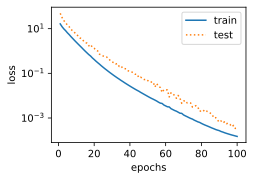

In [5]:
# 这里就是把x，x**2，x**3作为3个feature丢进去做了一个线性回归，视为正常的训练和测试
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],
             labels[:n_train], labels[n_train:])

final epoch: train loss 114.44552612304688 test loss 860.0780639648438
weight: tensor([[14.6082]]) 
bias: tensor([1.7576])


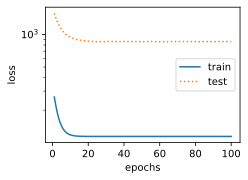

In [6]:
# 这里是仅把x一阶作为1个feature丢入线性网络进行训练，视为欠拟合
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train],
             labels[n_train:])

final epoch: train loss 1.9514191150665283 test loss 1410.068115234375
weight: tensor([[0.8783, 0.7471, 0.6946]]) 
bias: tensor([2.9501])


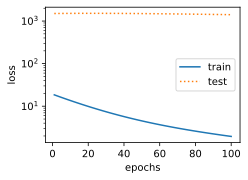

In [7]:
# 这里和第一次一样，但是训练数据仅仅用两个，用训练样本不足代表过拟合
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])